In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 38kB/s 
     |████████████████████████████████| 4.3MB 33.0MB/s 
     |████████████████████████████████| 501kB 45.5MB/s 


## Import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [3]:
from tensorflow.keras.datasets import mnist

## Load data

In [4]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

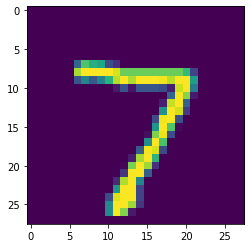

In [8]:
plt.imshow(X_test[0])

In [9]:
X_train.max()

255

In [21]:
## Normalise data

In [15]:
X_train=X_train/255.0

In [16]:
X_test=X_test/255.0

In [17]:
X_train=X_train.reshape(60000,28,28,1)

In [18]:
X_test=X_test.reshape(10000,28,28,1)

In [20]:
X_train.shape

(60000, 28, 28, 1)

In [22]:
X_train[0].shape

(28, 28, 1)

In [42]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(10,activation='softmax'))




In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [46]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
history=model.fit(X_train,Y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.2434 - accuracy: 0.9252 - val_loss: 0.0557 - val_accuracy: 0.9820
Epoch 2/10
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.0870 - accuracy: 0.9744 - val_loss: 0.0386 - val_accuracy: 0.9873
Epoch 3/10
60000/60000 [==============================] - 165s 3ms/sample - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.0342 - val_accuracy: 0.9877
Epoch 4/10
60000/60000 [==============================] - 165s 3ms/sample - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0310 - val_accuracy: 0.9903
Epoch 5/10
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0307 - val_accuracy: 0.9900
Epoch 6/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0281 - val_accuracy: 0.9903
Epoch 7/10
60000/60000 [==========================

In [48]:
model.evaluate(X_test,Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.027963213104544228, 0.9916]

##Learning Curves

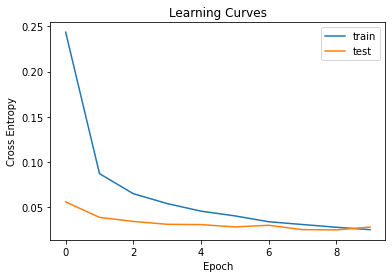

In [51]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

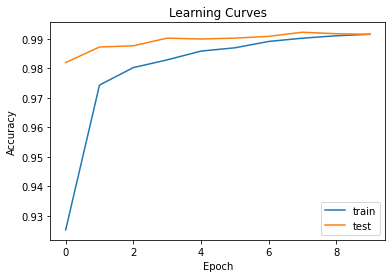

In [53]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Got 99.16 Accuracy